In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_train=pd.read_csv('../data/train.csv')
df_store = pd.read_csv('../data/store.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_22936\3683741112.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv('../data/train.csv')


In [8]:
#Merge the two datasets based on the store column on left
total_df = pd.merge(df_store,df_train, on='Store', how ='left')
print('Data has been successfully merged')

Data has been successfully merged


In [9]:
#creating a copy of the dataset for further featre engineering

df = total_df.copy()

In [10]:
#handling missing value 
print(df.isnull().sum())

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64


In [11]:
#filling the null value with the mean of column
df['CompetitionDistance'].fillna(df['CompetitionDistance'].mean(),inplace=True)

#fill them with minimum value for month and year
df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].min(),inplace=True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].min(),inplace=True)

#fill them with 0 value
df['Promo2SinceWeek'].fillna(0,inplace=True)
df['Promo2SinceYear'].fillna(0,inplace=True)
df['PromoInterval'].fillna(0,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_22936\390190294.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionDistance'].fillna(df['CompetitionDistance'].mean(),inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_22936\390190294.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [12]:
print(df.isnull().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64


c:\Users\hp\anaconda\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\hp\anaconda\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


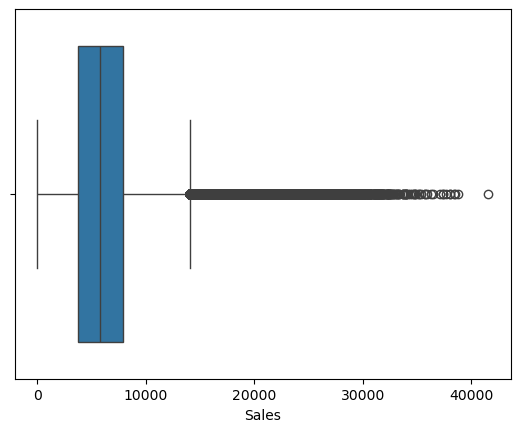

In [14]:
#Handling Outliers & Outlier treatments
# Identify the outliers
# In this example, we will use the box plot to identify the outliers for the 'Sales' variable
sns.boxplot(x='Sales', data=total_df)
# Decide on the outlier treatment strategy
# In this example, we will winsorize the outliers for the 'sales' variable

from scipy.stats.mstats import winsorize
total_df['Sales'] = winsorize(total_df[ 'Sales'], limits=[0.05, 0.05])

# Alternatively, you can remove the outliers for the "Sales' variable
q1 = total_df['Sales'].quantile (0.25)
q3 = total_df['Sales'].quantile (0.75)
iqr = q3 - q1
df = total_df[(total_df['Sales'] >=q1 - 1.5*iqr) & (total_df[ 'Sales'] <= q3 + 1.5*iqr)]

In [17]:
#Encoding catagorical column
#one-hot encoding
total_df['StateHoliday'] = total_df['StateHoliday'].astype(str)

df = pd.get_dummies(total_df, columns=['StateHoliday'])

#also we can use lable encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['StateHoliday'] = le.fit_transform(total_df['StateHoliday'])

In [ ]:
#Textual Data Preprocessing 

In [ ]:
#Multicollineartiy

In [18]:
#import the necessary library for calculating variance
1 # Import the necessary library for calculating Variance Inflation Factor (VIF).
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Define a function named 'cale_vif' that calculates the VIF for each column in the input DataFrame 'X'.
def calc_vif(x):
   
# Calculating VIF
   vif = pd.df()
   vif[ "variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(x.shape[1])]

   return(vif)
